In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sum-cleaned-kearifan/sum_cleaned.csv


In [2]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df_cleaned_3 = pd.read_csv('/kaggle/input/sum-cleaned-kearifan/sum_cleaned.csv')
df_cleaned_3

,Unnamed: 0,Istilah,Asal Daerah,Deskripsi,Judul Esai,Link Esai,Diambil dari Penulis Author(s),Related to SDGs,Link Foto (opsional),Essay Kontes Ke,Isi
0,0,Ampa Fare,NTB,Tradisi musim panen dimana padi yang telah dik...,Parafu Ro Waro dalam Pusaran Mata Air: Menghid...,https://drive.google.com/open?id=1cKyTeGXRZxck...,Kasmiatun,No. 6,NaN,No. 3,"Populasi penduduk dunia yang kian bertambah, d..."
1,1,Bau Nyale,NTB,Tradisi menangkap cacing laut yang dilakukan m...,Parafu Ro Waro dalam Pusaran Mata Air: Menghid...,https://drive.google.com/open?id=1cKyTeGXRZxck...,Kasmiatun,No. 6,NaN,No. 3,"Populasi penduduk dunia yang kian bertambah, d..."
2,2,Beas Perelek,Jawa Barat,Tradisi patungan/urunan warga dalam bentuk sum...,Mewujudkan Dunia Tanpa Kelaparan (No Hunger) M...,https://drive.google.com/open?id=1l8i3YsUEDwKx...,Heri Heryana,"No. 2, 3, & 15",NaN,No. 3,Tahun 2022 merupakan tahun ke-7 pelaksanaan pr...
3,3,Dawan,"Pulau Timor, NTT","sapaan orang bukan ""Atoin Meto"" kepada masyara...",Tradisi Usá: Kearifan Lokal Atoin Meto (Dawan)...,https://drive.google.com/open?id=1YKwwxv3VXROf...,Jondry Siki,NaN,NaN,No. 3,Dawan adalah salah satu etnis yang mendiami Pu...
4,4,Dusung,Maluku,Merupakan kearifan lokal masyarakat Maluku yan...,Belajar dari Dusung Konsep Agroforestri Intens...,https://drive.google.com/open?id=1p11P4IR7H15w...,Moch Sofiyulloh,"No. 2, 3, & 15",NaN,No. 3,"Dunia saat ini berkembang sangat pesat, dengan..."
...,...,...,...,...,...,...,...,...,...,...,...
381,392,Ngahuma,NaN,Ngahuma adalah sistem pertanian tradisional ma...,Pertanian Berbasis Kearifan Budaya hingga Bang...,https://drive.google.com/open?id=1YW0dtNRJdnhI...,Muhammad Naufal Rizqulloh,"No. 1,2,3,4",NaN,Ke 3,Kegiatan bertani pada hakikatnya merupakan keg...
382,393,Jaranan Buto,Jawa Timur,Jaranan Buto adalah pertunjukan seni khas Bany...,Peran dan Keterlibatan Perempuan dalam Kesenia...,https://drive.google.com/open?id=19740DnCJa3RQ...,Julita Hasanah,No. 5,NaN,Ke 3,Terlahir sebagai perempuan asli Jawa Timur mem...
383,394,Mokarawo,Gorontalo,Mokarawo merupakan seni sulam tradisional khas...,Fusi Tradisi Huyula dan Mokarawo sebagai Prins...,https://drive.google.com/open?id=1a1Ks8ce9vy22...,Muhammad Rizq Gobel,"No. 1,4,5,8",NaN,Ke 3,Peradaban manusia yang semakin maju dan tidak ...
384,395,Wija pattola palallo,Sulawesi Selatan,Wija pattola palallo adalah prinsip kearifan l...,Wija Pattola Palallo: Motivasi Orang Tua Bugis...,https://drive.google.com/open?id=1K5io345ZMTfW...,Adnan Achiruddin Saleh,NaN,NaN,Ke 3,Sebuah percakapan tentang masa depan; Melo ka ...


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
def clean_text_and_count_stopwords(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    stopword_count = Counter(word for word in tokens if word in stop_words)
    
    tokens_cleaned = [word for word in tokens if word not in stop_words]
    
    tokens_stemmed = [stemmer.stem(word) for word in tokens_cleaned]
    cleaned_text = ' '.join(tokens_stemmed)
    
    return cleaned_text, stopword_count

df_cleantext = df_cleaned_3['Deskripsi'].apply(clean_text_and_count_stopwords)

df_cleaned_3['Deskripsi_Cleaned'] = df_cleantext.apply(lambda x: x[0])
df_cleaned_3['Stopword_Count'] = df_cleantext.apply(lambda x: x[1])  
print(df_cleaned_3[['Deskripsi_Cleaned', 'Stopword_Count']].head())

                                   Deskripsi_Cleaned  \
0  tradisi musim panen mana padi kumpul angkut ru...   
1  tradisi tangkap cacing laut masyarakat suku sa...   
2  tradisi patunganurunan warga bentuk sumbang be...   
3  sapa orang atoin meto masyarakat tutur uab met...   
4  arif lokal masyarakat malu jalan turun turun p...   

                                      Stopword_Count  
0  {'yang': 1, 'telah': 1, 'ke': 1, 'atau': 1, 'i...  
1  {'yang': 2, 'dilakukan': 1, 'setiap': 1, 'tahu...  
2  {'dalam': 4, 'sebanyak': 1, 'atau': 3, 'satu':...  
3  {'bukan': 1, 'kepada': 1, 'yang': 2, 'kata': 2...  
4  {'merupakan': 1, 'yang': 2, 'secara': 1, 'dimu...  


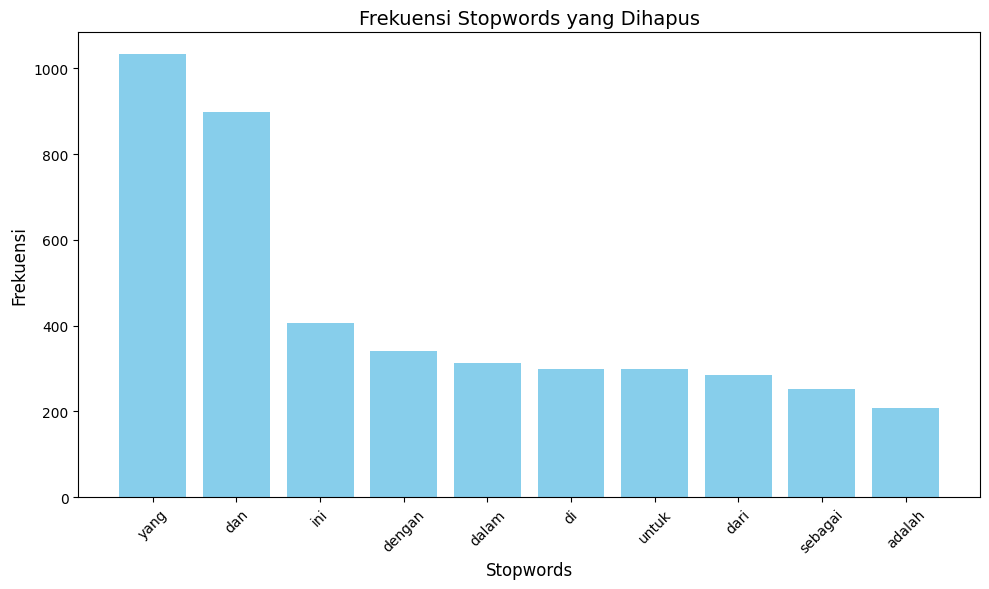

In [8]:
total_stopword_count = sum(df_cleaned_3['Stopword_Count'], Counter())
top_stopwords = total_stopword_count.most_common(10)
stopwords, counts = zip(*top_stopwords)

plt.figure(figsize=(10, 6))
plt.bar(stopwords, counts, color='skyblue')

plt.title('Frekuensi Stopwords yang Dihapus', fontsize=14)
plt.xlabel('Stopwords', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
df_cleaned_3.to_csv("new_datadbscan.csv",index=False)